In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
%matplotlib inline

In [5]:
matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = "AppleGothic"

### 한글 설정 이거 돌려보기
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
#### 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
##### Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

https://kosis.kr/index/index.do

## 국내에서 받는 파일은 한글깨짐!
### encoding = 'cp949' 뒤에 붙여서 불러오기

In [12]:
df_kosis = pd.read_csv('pd_sample/population_kosis_1997_2019.csv',encoding='cp949')
df_kosis.head()

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,...,2019. 09.2,2019. 10,2019. 10.1,2019. 10.2,2019. 11,2019. 11.1,2019. 11.2,2019. 12,2019. 12.1,2019. 12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,11602,25613,12989,12624,23727,12097,11630,21228,11023,10205
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,2066,4513,2337,2176,4170,2128,2042,3670,1953,1717
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,642,1430,717,713,1321,683,638,1240,671,569
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,514,1150,600,550,1100,585,515,942,488,454


In [13]:
df_kosis.shape

(19, 829)

In [14]:
# 전체파일보기 (모든 컬럼 보이도록 설정)
pd.options.display.max_columns = 892

In [21]:
df_kosis.head(5)

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,1997. 04,1997. 04.1,1997. 04.2,1997. 05,1997. 05.1,1997. 05.2,1997. 06,1997. 06.1,1997. 06.2,1997. 07,1997. 07.1,1997. 07.2,1997. 08,1997. 08.1,1997. 08.2,1997. 09,1997. 09.1,1997. 09.2,1997. 10,1997. 10.1,1997. 10.2,1997. 11,1997. 11.1,1997. 11.2,1997. 12,1997. 12.1,1997. 12.2,1998. 01,1998. 01.1,1998. 01.2,1998. 02,1998. 02.1,1998. 02.2,1998. 03,1998. 03.1,1998. 03.2,1998. 04,1998. 04.1,1998. 04.2,1998. 05,1998. 05.1,1998. 05.2,1998. 06,1998. 06.1,1998. 06.2,1998. 07,1998. 07.1,1998. 07.2,1998. 08,1998. 08.1,1998. 08.2,1998. 09,1998. 09.1,1998. 09.2,1998. 10,1998. 10.1,1998. 10.2,1998. 11,1998. 11.1,1998. 11.2,1998. 12,1998. 12.1,1998. 12.2,1999. 01,1999. 01.1,1999. 01.2,1999. 02,1999. 02.1,1999. 02.2,1999. 03,1999. 03.1,1999. 03.2,1999. 04,1999. 04.1,1999. 04.2,1999. 05,1999. 05.1,1999. 05.2,1999. 06,1999. 06.1,1999. 06.2,1999. 07,1999. 07.1,1999. 07.2,1999. 08,1999. 08.1,1999. 08.2,1999. 09,1999. 09.1,1999. 09.2,1999. 10,1999. 10.1,1999. 10.2,1999. 11,1999. 11.1,1999. 11.2,1999. 12,1999. 12.1,1999. 12.2,2000. 01,2000. 01.1,2000. 01.2,2000. 02,2000. 02.1,2000. 02.2,2000. 03,2000. 03.1,2000. 03.2,2000. 04,2000. 04.1,2000. 04.2,2000. 05,2000. 05.1,2000. 05.2,2000. 06,2000. 06.1,2000. 06.2,2000. 07,2000. 07.1,2000. 07.2,2000. 08,2000. 08.1,2000. 08.2,2000. 09,2000. 09.1,2000. 09.2,2000. 10,2000. 10.1,2000. 10.2,2000. 11,2000. 11.1,2000. 11.2,2000. 12,2000. 12.1,2000. 12.2,2001. 01,2001. 01.1,2001. 01.2,2001. 02,2001. 02.1,2001. 02.2,2001. 03,2001. 03.1,2001. 03.2,2001. 04,2001. 04.1,2001. 04.2,2001. 05,2001. 05.1,2001. 05.2,2001. 06,2001. 06.1,2001. 06.2,2001. 07,2001. 07.1,2001. 07.2,2001. 08,2001. 08.1,2001. 08.2,2001. 09,2001. 09.1,2001. 09.2,2001. 10,2001. 10.1,2001. 10.2,2001. 11,2001. 11.1,2001. 11.2,2001. 12,2001. 12.1,2001. 12.2,2002. 01,2002. 01.1,2002. 01.2,2002. 02,2002. 02.1,2002. 02.2,2002. 03,2002. 03.1,2002. 03.2,2002. 04,2002. 04.1,2002. 04.2,2002. 05,2002. 05.1,2002. 05.2,2002. 06,2002. 06.1,2002. 06.2,2002. 07,2002. 07.1,2002. 07.2,2002. 08,2002. 08.1,2002. 08.2,2002. 09,2002. 09.1,2002. 09.2,2002. 10,2002. 10.1,2002. 10.2,2002. 11,2002. 11.1,2002. 11.2,2002. 12,2002. 12.1,2002. 12.2,2003. 01,2003. 01.1,2003. 01.2,2003. 02,2003. 02.1,2003. 02.2,2003. 03,2003. 03.1,2003. 03.2,2003. 04,2003. 04.1,2003. 04.2,2003. 05,2003. 05.1,2003. 05.2,2003. 06,2003. 06.1,2003. 06.2,2003. 07,2003. 07.1,2003. 07.2,2003. 08,2003. 08.1,2003. 08.2,2003. 09,2003. 09.1,2003. 09.2,2003. 10,2003. 10.1,2003. 10.2,2003. 11,2003. 11.1,2003. 11.2,2003. 12,2003. 12.1,2003. 12.2,2004. 01,2004. 01.1,2004. 01.2,2004. 02,2004. 02.1,2004. 02.2,2004. 03,2004. 03.1,2004. 03.2,2004. 04,2004. 04.1,2004. 04.2,2004. 05,2004. 05.1,2004. 05.2,2004. 06,2004. 06.1,2004. 06.2,2004. 07,2004. 07.1,2004. 07.2,2004. 08,2004. 08.1,2004. 08.2,2004. 09,2004. 09.1,2004. 09.2,2004. 10,2004. 10.1,2004. 10.2,2004. 11,2004. 11.1,2004. 11.2,2004. 12,2004. 12.1,2004. 12.2,2005. 01,2005. 01.1,2005. 01.2,2005. 02,2005. 02.1,2005. 02.2,2005. 03,2005. 03.1,2005. 03.2,2005. 04,2005. 04.1,2005. 04.2,2005. 05,2005. 05.1,2005. 05.2,2005. 06,2005. 06.1,2005. 06.2,2005. 07,2005. 07.1,2005. 07.2,2005. 08,2005. 08.1,2005. 08.2,2005. 09,2005. 09.1,2005. 09.2,2005. 10,2005. 10.1,2005. 10.2,2005. 11,2005. 11.1,2005. 11.2,2005. 12,2005. 12.1,2005. 12.2,2006. 01,2006. 01.1,2006. 01.2,2006. 02,2006. 02.1,2006. 02.2,2006. 03,2006. 03.1,2006. 03.2,2006. 04,2006. 04.1,2006. 04.2,2006. 05,2006. 05.1,2006. 05.2,2006. 06,2006. 06.1,2006. 06.2,2006. 07,2006. 07.1,2006. 07.2,2006. 08,2006. 08.1,2006. 08.2,2006. 09,2006. 09.1,2006. 09.2,2006. 10,2006. 10.1,2006. 10.2,2006. 11,2006. 11.1,2006. 11.2,2006. 12,2006. 12.1,2006. 12.2,2007. 01,2007. 01.1,2007. 01.2,2007. 02,2007. 02.1,2007. 02.2,2007. 03,2007. 03.1,2007. 03.2,2007. 04,2007. 04.1,2007. 04.2,2007. 05,2007. 05.1,2007. 05.2,2007. 06,2007. 06.1,2007. 06.2,2007. 07,2007. 07.1,2007. 07.2,2007. 08,2007. 08.1,2007. 08.2,2007. 09,2007. 09.1,2007. 

In [41]:
# pd.melt 데이터 재구조화 할 때 사용 column이 variable의 값으로 --> column명들이 중복이 되어 있을 때 사용
# pd.melt (data,id_vars, var_name, value_name)
df = df_kosis.melt(id_vars = '시군구별') # 년도/월 별로 나누고 그 column에 해당하는 값, value는 원래 그 column에 있는 값들 

df.head(60) # 그럼 년도/월 별로 총 인구수, 그 다음에 남자인구수, 그 다음에 여자 인구수 이렇게 나옴 그 다음년도/월 총인구,남녀인구 

,시군구별,variable,value
0,시군구별,1997. 01,계 (명)
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646
6,광주광역시,1997. 01,2166
7,대전광역시,1997. 01,2003
8,울산광역시,1997. 01,1754
9,세종특별자치시,1997. 01,-


In [34]:
df.shape

(15732, 3)

In [25]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [35]:
df[df['시군구별'] == '시군구별'] # '시군구별'이라는 원래 제목 column 없애야함'

,시군구별,variable,value
0,시군구별,1997. 01,계 (명)
19,시군구별,1997. 01.1,남자 (명)
38,시군구별,1997. 01.2,여자 (명)
57,시군구별,1997. 02,계 (명)
76,시군구별,1997. 02.1,남자 (명)
...,...,...,...
15637,시군구별,2019. 11.1,남자 (명)
15656,시군구별,2019. 11.2,여자 (명)
15675,시군구별,2019. 12,계 (명)
15694,시군구별,2019. 12.1,남자 (명)


In [42]:
df = df[df['시군구별'] != '시군구별'].copy() # df 시군구별에서 시군구별 아닌 것만 가져와라! 앞에 exclamation mark 붙였으니까

In [43]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [44]:
df.head() # 시군구별 빠졌음

,시군구별,variable,value
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646


In [45]:
df.tail()

,시군구별,variable,value
15727,전라북도,2019. 12.2,290
15728,전라남도,2019. 12.2,353
15729,경상북도,2019. 12.2,455
15730,경상남도,2019. 12.2,646
15731,제주특별자치도,2019. 12.2,182


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      14904 non-null  object
 1   variable  14904 non-null  object
 2   value     14904 non-null  object
dtypes: object(3)
memory usage: 465.8+ KB


### 이제 variable을 년/월, 성별로 나눠보자
### total은 성별이 없네 (1997.01.01 == 남자, 1997.01.02 == 여자)

In [48]:
k = {'a':'ko','b':'np'}

In [49]:
k['c'] = 'jp'

In [50]:
k

{'a': 'ko', 'b': 'np', 'c': 'jp'}

* 이런식으로 데이터프레임에도 추가가능

In [54]:
print(df['variable'])
print(type(df['variable'])) # 하나의 행이니까 series로 해서 리턴

1          1997. 01
2          1997. 01
3          1997. 01
4          1997. 01
5          1997. 01
            ...    
15727    2019. 12.2
15728    2019. 12.2
15729    2019. 12.2
15730    2019. 12.2
15731    2019. 12.2
Name: variable, Length: 14904, dtype: object
<class 'pandas.core.series.Series'>


In [58]:
# 뒤에 str붙여서 stringmethods로 변경 --> 여기에 split있음
print(type(df['variable'].str))

<class 'pandas.core.strings.StringMethods'>


In [62]:
print(type(df['variable'].str.split('.'))) # 타입 : series --> 그럼 인덱싱 불가? 
# groupby랑 똑같아  Male이랑 Female p.Male 이렇게 가져왔잖아
df['variable'].str.split('.') # 구분이 .으로 되어있으니까 .으로 나누기 

<class 'pandas.core.series.Series'>


1           [1997,  01]
2           [1997,  01]
3           [1997,  01]
4           [1997,  01]
5           [1997,  01]
              ...      
15727    [2019,  12, 2]
15728    [2019,  12, 2]
15729    [2019,  12, 2]
15730    [2019,  12, 2]
15731    [2019,  12, 2]
Name: variable, Length: 14904, dtype: object

In [ ]:
#print(type(df['variable'].str.split('.')))
#df['연도'] = df['variable'].str.split('.')[0]
#df['월'] = df['variable'].str.split('.')[1]
#df['성별'] = df['variable'].str.split('.')[2]

In [63]:
# expand 이용!!!
df['연도'] = df['variable'].str.split('.',expand = True)[0]
df['월'] = df['variable'].str.split('.',expand = True)[1]
df['성별'] = df['variable'].str.split('.',expand = True)[2]

In [64]:
df.head() # 성별이 없으면 none

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,None
2,서울특별시,1997. 01,13205,1997,01,None
3,부산광역시,1997. 01,4201,1997,01,None
4,대구광역시,1997. 01,3345,1997,01,None
5,인천광역시,1997. 01,3646,1997,01,None


In [65]:
df.tail()

,시군구별,variable,value,연도,월,성별
15727,전라북도,2019. 12.2,290,2019,12,2
15728,전라남도,2019. 12.2,353,2019,12,2
15729,경상북도,2019. 12.2,455,2019,12,2
15730,경상남도,2019. 12.2,646,2019,12,2
15731,제주특별자치도,2019. 12.2,182,2019,12,2


In [71]:
print(type(df['variable'].str.split('.',expand = True))) # expand가 true면 dataframe으로 리턴
print(type(df['variable'].str.split('.'))) # series로 리턴 (default값은 false)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html
* str.expand참고

expand bool, default False
Expand the split strings into separate columns.

If True, return DataFrame/MultiIndex expanding dimensionality.

If False, return Series/Index, containing lists of strings.

dataframe에서는 인덱싱 이용해서 series로 가져오기 가능하니까 df[0] = df['variablename'] 이렇게 지정가능

In [74]:
df['variable'].str.split('.').iloc[0] # 아 series도 인덱싱은 가능, 근데 지금 그 한 줄안에 또 다른 리스트가 있다고 생각하면 됨 

['1997', ' 01']

In [76]:
df['variable'].str.split('.').iloc[0][0] # 이런식으로 

'1997'

* 정제되어 있지 않은 데이터 많음 (특히, 정부에서 받는 데이터)
* 쪼개고 막 그래야 함 (expand사용법 알아놓기)

In [77]:
# 모든 데이터가 object
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      14904 non-null  object
 1   variable  14904 non-null  object
 2   value     14904 non-null  object
 3   연도        14904 non-null  object
 4   월         14904 non-null  object
 5   성별        9936 non-null   object
dtypes: object(6)
memory usage: 1.4+ MB


In [79]:
df['성별'].unique() # series는 unique으로 값 확인
# 성별에 none이 포함되어 있음

array([None, '1', '2'], dtype=object)

In [80]:
df['성별'].nunique() # nan이 아닌 unique 값만 리턴

2

In [81]:
df['성별'] = df['성별'].fillna('전체') # fillna
# Replace all NaN elements with '전체's.

In [82]:
df['성별'].unique() # 그럼 1,2도 남,녀 이렇게 바꿔줘야지

array(['전체', '1', '2'], dtype=object)

In [83]:
df['성별'] = df['성별'].replace('1','남') # 1을 남으로 

In [84]:
df['성별'] = df['성별'].replace('2','여') # 2를 여로 

In [85]:
# df['성별'] = df['성별'].replace('1','남').replace('2','여') --> 이렇게도 가능 

In [88]:
df.tail() 

,시군구별,variable,value,연도,월,성별
15727,전라북도,2019. 12.2,290,2019,12,여
15728,전라남도,2019. 12.2,353,2019,12,여
15729,경상북도,2019. 12.2,455,2019,12,여
15730,경상남도,2019. 12.2,646,2019,12,여
15731,제주특별자치도,2019. 12.2,182,2019,12,여


In [90]:
# 빈도수 확인 : value_counts()
df['성별'].value_counts() # 이건 series로 리턴 (df에서 한 열을 뽑아오니까 1차원데이터)

남     4968
여     4968
전체    4968
Name: 성별, dtype: int64

### column이름 바꾸기 (위의 "variable", "value")
1. columns (df.rename(columns = {'원래이름':'바꿀이름})
2. mapper


In [92]:
df = df.rename(columns = {'variable':'기간','value':'출생아수'})
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체


In [93]:
df['출생아수'].unique()

array(['63268', '13205', '4201', ..., '160', '2986', '10205'],
      dtype=object)

In [94]:
df.sample(10) # 출생아수에 값이 없는 (-) 열도 있음 e.g. 세종특별자치시 2011.01.2 9623 
# 그래서 전체 데이터 확인이 무지무지무지 중요하다 (없는 값도 있을 수 있으므로)

,시군구별,기간,출생아수,연도,월,성별
1018,강원도,1998. 06.2,726,1998,06,여
10161,전라남도,2011. 11,1281,2011,11,전체
7131,광주광역시,2007. 06,1142,2007,06,전체
1585,울산광역시,1999. 04.2,632,1999,04,여
8643,경상남도,2009. 08.1,1305,2009,08,남
14134,경상남도,2017. 08.2,999,2017,08,여
9623,세종특별자치시,2011. 01.2,-,2011,01,여
14110,충청북도,2017. 08.1,473,2017,08,남
12709,경상남도,2015. 07.2,1197,2015,07,여
5817,부산광역시,2005. 07,1898,2005,07,전체


In [95]:
df['출생아수'] = df['출생아수'].replace('-',np.nan) 
# 넘파이에서 nan이란 값 지정할 수 있게 제공됨 np를 써야겠네 'none'으로 넣으면 str이 되기 때문에)
# 원래는 int잖아 출생아수니까

In [97]:
df.sample(10) # NaN으로 채워져서 보임 

,시군구별,기간,출생아수,연도,월,성별
1803,경상남도,1999. 08.1,1718,1999,08,남
2761,광주광역시,2001. 01.1,1066,2001,01,남
4114,경기도,2003. 01,10972,2003,01,전체
9971,전라남도,2011. 07.2,694,2011,07,여
10791,제주특별자치도,2012. 10,497,2012,10,전체
385,인천광역시,1997. 07.2,1412,1997,07,여
9408,부산광역시,2010. 10,2570,2010,10,전체
922,경기도,1998. 05,10915,1998,05,전체
7457,세종특별자치시,2007. 11.2,NaN,2007,11,여
2814,서울특별시,2001. 02.1,5258,2001,02,남


In [98]:
df.info() # 출생아수는 우리가 계산을 할 수 있어야 하니까 숫자타입으로 변경해야함 (object = 문자타입이니까)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    14904 non-null  object
 1   기간      14904 non-null  object
 2   출생아수    14364 non-null  object
 3   연도      14904 non-null  object
 4   월       14904 non-null  object
 5   성별      14904 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [99]:
df['출생아수'].astype(int)
# ValueError: cannot convert float NaN to integer
# NaN을 float으로 취급 

ValueError: cannot convert float NaN to integer

In [102]:
df['출생아수'] = df['출생아수'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    14904 non-null  object 
 1   기간      14904 non-null  object 
 2   출생아수    14364 non-null  float64
 3   연도      14904 non-null  object 
 4   월       14904 non-null  object 
 5   성별      14904 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [107]:
df.iloc[9623] # 또잉? 아까랑 다른 값 가져오네? 

시군구별        충청북도
기간      2011. 11
출생아수        1125
연도          2011
월             11
성별            전체
Name: 10158, dtype: object

In [108]:
df.loc[9623] # 숫자로 되어있다고 iloc[숫자] 이렇게 하면 안되고 loc[숫자] 해야지 원래 값 가져옴
# NaN is still remaining as NaN

시군구별       세종특별자치시
기간      2011. 01.2
출생아수           NaN
연도            2011
월               01
성별               여
Name: 9623, dtype: object

In [109]:
df['출생아수'].describe() # 특정 열 정보 볼때는 describe 사용

count    14364.000000
mean      3072.798942
std       6683.035581
min         30.000000
25%        638.000000
50%       1045.000000
75%       1947.000000
max      63268.000000
Name: 출생아수, dtype: float64

### 이 전까지 전처리 작업 (분석전에)
### 이제 이 전처리 된 데이터를 가지고 분석하기
시군구별 : 전국<br>
성별 : 전체<br>
데이터 가져오기

#### 전국별로 성별전체 가져오기

In [116]:
df_all = df[(df['시군구별'] == '전국') & (df['성별'] == '전체')] # isin 사용 불가능 비교하는 대상이 다르기 때문에 
print(df_all['시군구별'].unique())
print(df_all['성별'].unique())
df_all.head()

['전국']
['전체']


,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
58,전국,1997. 02,58144.0,1997,02,전체
115,전국,1997. 03,62160.0,1997,03,전체
172,전국,1997. 04,56949.0,1997,04,전체
229,전국,1997. 05,55270.0,1997,05,전체


In [115]:
df_all.tail()

,시군구별,기간,출생아수,연도,월,성별
15448,전국,2019. 08,24371.0,2019,08,전체
15505,전국,2019. 09,24090.0,2019,09,전체
15562,전국,2019. 10,25613.0,2019,10,전체
15619,전국,2019. 11,23727.0,2019,11,전체
15676,전국,2019. 12,21228.0,2019,12,전체


### pandas를 통한 시각화

In [117]:
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
58,전국,1997. 02,58144.0,1997,02,전체
115,전국,1997. 03,62160.0,1997,03,전체
172,전국,1997. 04,56949.0,1997,04,전체
229,전국,1997. 05,55270.0,1997,05,전체


In [118]:
df_all.set_index(['연도','월']) # '연도'와 '월'을 인덱스로 사용하기 여전히 dataframe임 실제 데이터에는 영향없음 

시군구별        기간     출생아수  성별
연도   월                              
1997  01   전국  1997. 01  63268.0  전체
      02   전국  1997. 02  58144.0  전체
      03   전국  1997. 03  62160.0  전체
      04   전국  1997. 04  56949.0  전체
      05   전국  1997. 05  55270.0  전체
...       ...       ...      ...  ..
2019  08   전국  2019. 08  24371.0  전체
      09   전국  2019. 09  24090.0  전체
      10   전국  2019. 10  25613.0  전체
      11   전국  2019. 11  23727.0  전체
      12   전국  2019. 12  21228.0  전체

[276 rows x 4 columns]

<AxesSubplot:xlabel='연도,월'>

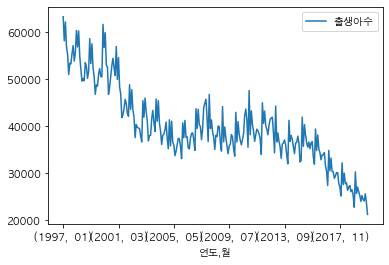

In [119]:
df_all.set_index(['연도','월']).plot() #아까 인덱스로 변환한 값 (연도,월)이 x값으로 들어감 y는 출생아수

<AxesSubplot:xlabel='연도,월'>

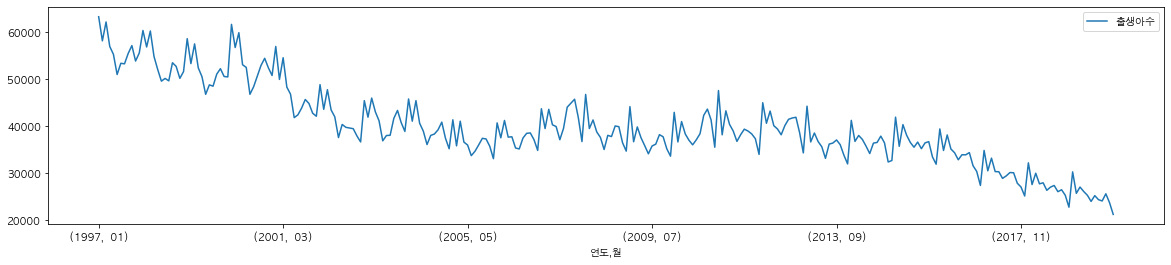

In [121]:
df_all.set_index(['연도','월']).plot(figsize = (20,4))

<AxesSubplot:xlabel='연도,월'>

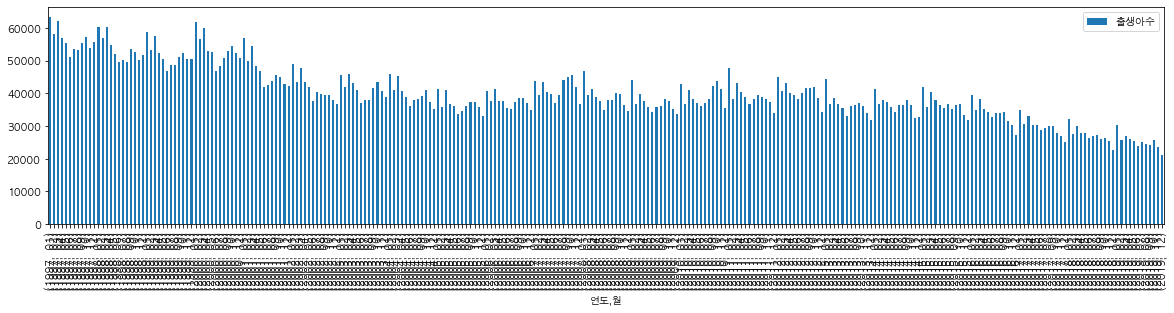

In [122]:
#df_all.set_index(['연도','월']).plot.bar(figsize = (20,4)) --> 1번방법
df_all.set_index(['연도','월']).plot(kind = 'bar',figsize = (20,4)) # --> 2번방법
# 막대그래프는 다보여줌

<AxesSubplot:xlabel='연도,월'>

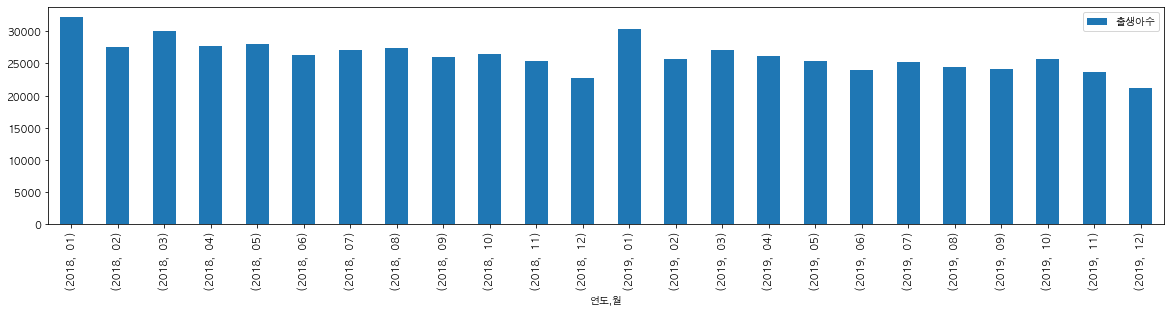

In [124]:
# 최근 24개만 가져와서 그래프로 그린다.
df_all[-24:].set_index(['연도','월']).plot(kind = 'bar',figsize = (20,4))

In [125]:
df_all[-24:] # -가 붙었으니까 최근 24개만 가져오기

,시군구별,기간,출생아수,연도,월,성별
14365,전국,2018. 01,32198.0,2018,01,전체
14422,전국,2018. 02,27575.0,2018,02,전체
14479,전국,2018. 03,29987.0,2018,03,전체
14536,전국,2018. 04,27734.0,2018,04,전체
14593,전국,2018. 05,27949.0,2018,05,전체
14650,전국,2018. 06,26357.0,2018,06,전체
14707,전국,2018. 07,27033.0,2018,07,전체
14764,전국,2018. 08,27381.0,2018,08,전체
14821,전국,2018. 09,26066.0,2018,09,전체
14878,전국,2018. 10,26474.0,2018,10,전체


<AxesSubplot:xlabel='연도,월'>

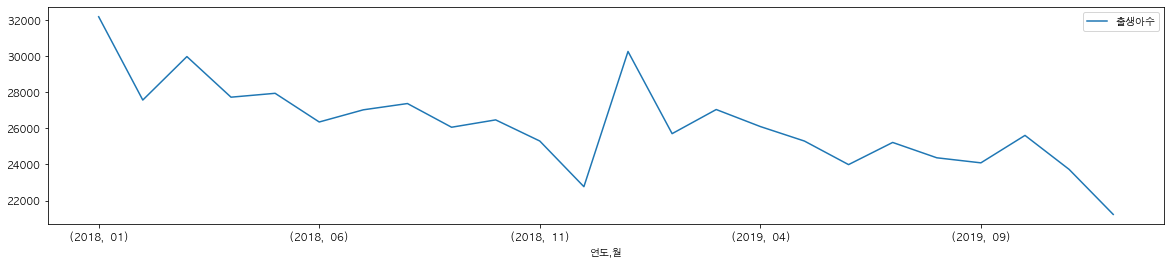

In [126]:
df_all[-24:].set_index(['연도','월']).plot(figsize = (20,4))

In [127]:
df_all[-24] # 데이터프레임은 이거 불가능 --> 이렇게 쓰면 column불러오는거

KeyError: -24

In [136]:
df_all[-24:-12] # 슬라이싱하면 행 값은 가능

,시군구별,기간,출생아수,연도,월,성별
14365,전국,2018. 01,32198.0,2018,01,전체
14422,전국,2018. 02,27575.0,2018,02,전체
14479,전국,2018. 03,29987.0,2018,03,전체
14536,전국,2018. 04,27734.0,2018,04,전체
14593,전국,2018. 05,27949.0,2018,05,전체
14650,전국,2018. 06,26357.0,2018,06,전체
14707,전국,2018. 07,27033.0,2018,07,전체
14764,전국,2018. 08,27381.0,2018,08,전체
14821,전국,2018. 09,26066.0,2018,09,전체
14878,전국,2018. 10,26474.0,2018,10,전체


<AxesSubplot:xlabel='연도,월'>

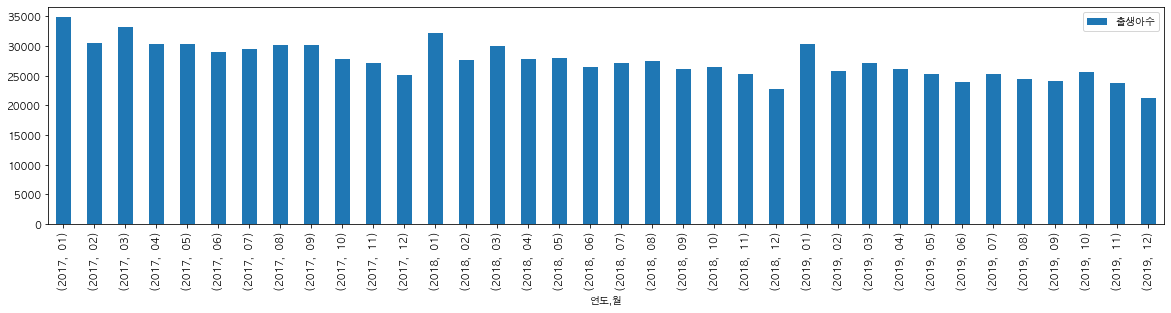

In [139]:
# 최근 3년
df_all[-36:].set_index(['연도','월']).plot(kind = 'bar',figsize = (20,4))

### seaborn을 통한 시각화
* seaborn이 훨씬 그래프 만들기 예쁨

In [140]:
df_all.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
58,전국,1997. 02,58144.0,1997,02,전체
115,전국,1997. 03,62160.0,1997,03,전체
172,전국,1997. 04,56949.0,1997,04,전체
229,전국,1997. 05,55270.0,1997,05,전체


<AxesSubplot:xlabel='연도', ylabel='출생아수'>

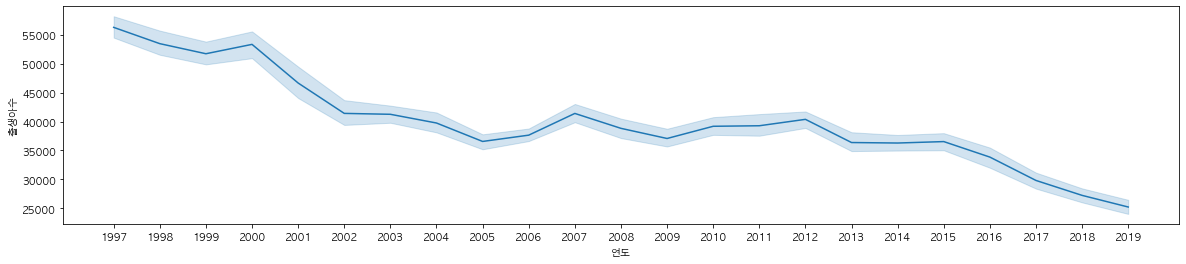

In [141]:
plt.figure(figsize = (20,4))
sns.lineplot(data = df_all,x = '연도',y = '출생아수') 
#오 되게 간단하네? '연도' '출생아수' 이렇게 지정해주면 알아서 그래프 만들어줌
# 진한 선은 평균
# 옅은 색은 confidence interval

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

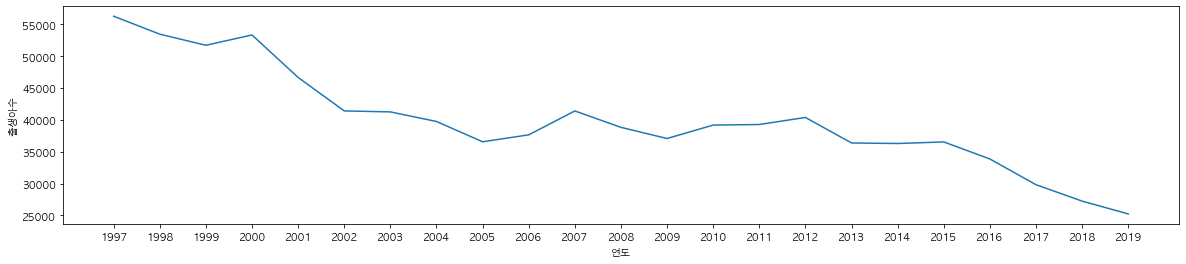

In [142]:
plt.figure(figsize = (20,4))
sns.lineplot(data = df_all,x = '연도',y = '출생아수',ci = None) # confidence interval 제거 (ci = None)

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

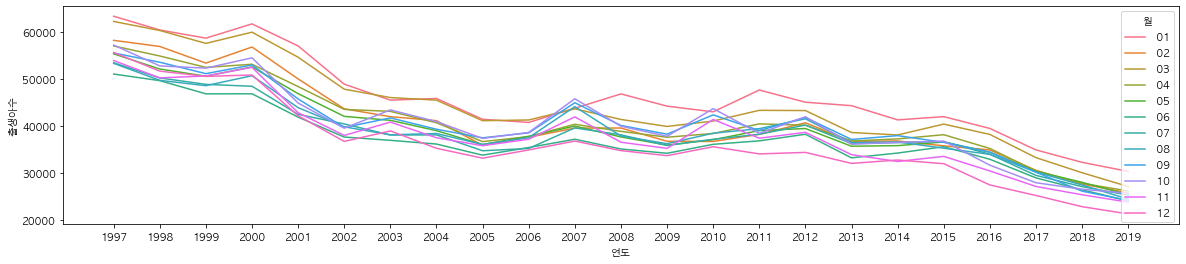

In [143]:
plt.figure(figsize = (20,4))
sns.lineplot(data = df_all,x = '연도',y = '출생아수',ci = None, hue = '월') # hue = '월' 월별로 보여줌

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

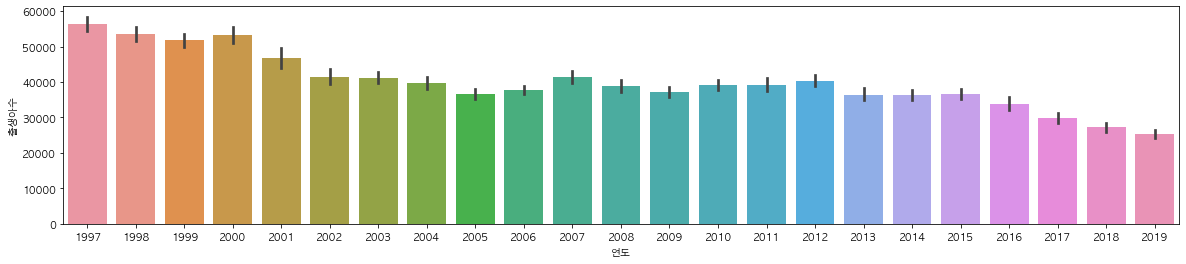

In [144]:
plt.figure(figsize = (20,4))
sns.barplot(data = df_all,x = '연도',y = '출생아수') 

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

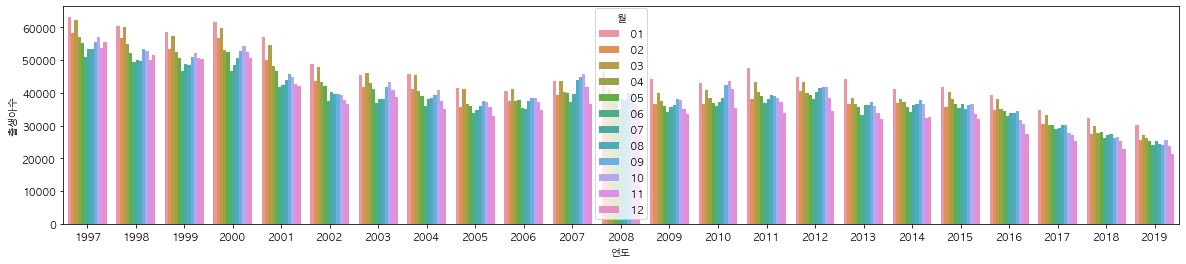

In [145]:
plt.figure(figsize = (20,4))
sns.barplot(data = df_all,x = '연도',y = '출생아수', hue = '월') 

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

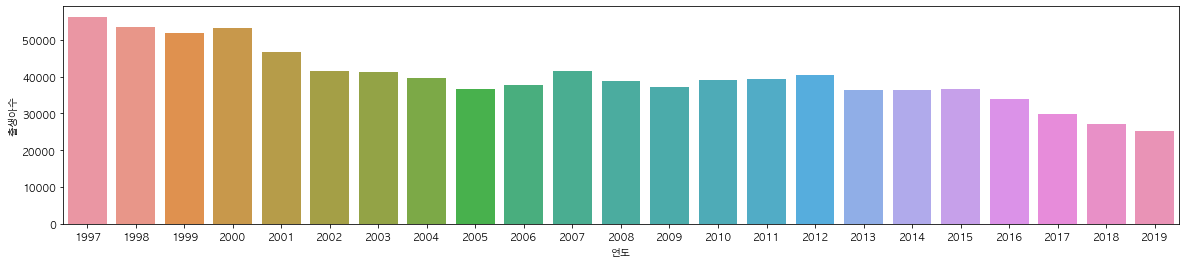

In [146]:
plt.figure(figsize = (20,4))
sns.barplot(data = df_all,x = '연도',y = '출생아수', ci = None) 

### 지역별 출생아수

In [147]:
df_local = df[df['시군구별'] != '전국'].copy()
df_local.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
6,광주광역시,1997. 01,2166.0,1997,01,전체


In [149]:
df_local['시군구별'].unique() # 확인했을 때 전국이 있으면 안됨

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

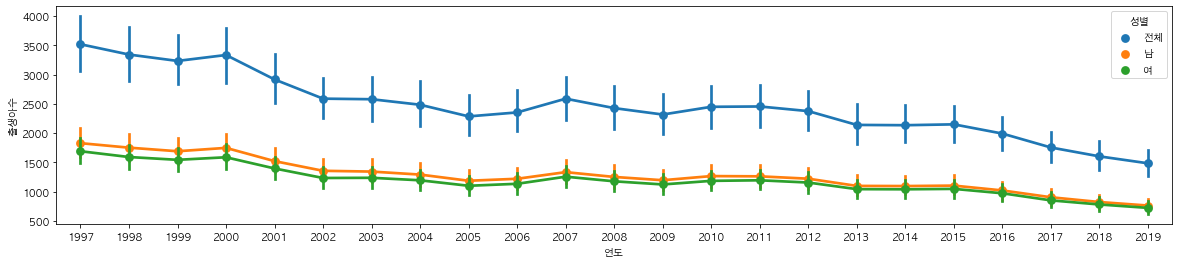

In [152]:
plt.figure(figsize = (20,4))
sns.pointplot(data = df_local,x = '연도',y = '출생아수',hue = '성별')

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997. 01,63268.0,1997,01,전체
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
...,...,...,...,...,...,...
15727,전라북도,2019. 12.2,290.0,2019,12,여
15728,전라남도,2019. 12.2,353.0,2019,12,여
15729,경상북도,2019. 12.2,455.0,2019,12,여
15730,경상남도,2019. 12.2,646.0,2019,12,여


In [155]:
df_local_all = df_local[df_local['성별'] == '전체'].copy()
df_local_all.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997. 01,13205.0,1997,01,전체
3,부산광역시,1997. 01,4201.0,1997,01,전체
4,대구광역시,1997. 01,3345.0,1997,01,전체
5,인천광역시,1997. 01,3646.0,1997,01,전체
6,광주광역시,1997. 01,2166.0,1997,01,전체


In [156]:
df_local_all['성별'].unique()

array(['전체'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

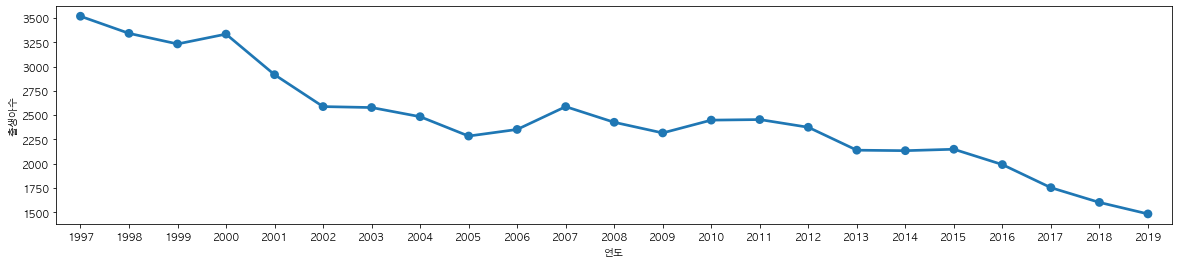

In [160]:
plt.figure(figsize = (20,4))
sns.pointplot(data = df_local_all,x = '연도',y = '출생아수',ci = None)

<AxesSubplot:xlabel='연도', ylabel='출생아수'>

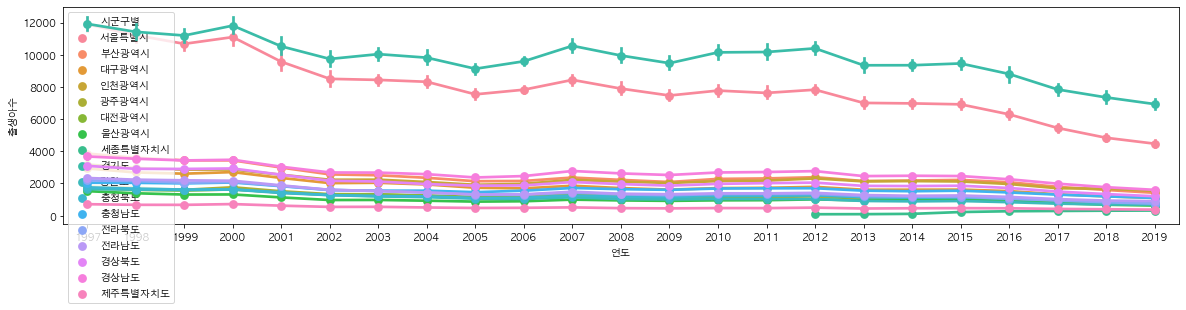

In [161]:
plt.figure(figsize = (20,4))
sns.pointplot(data = df_local_all,x = '연도',y = '출생아수',hue = '시군구별')

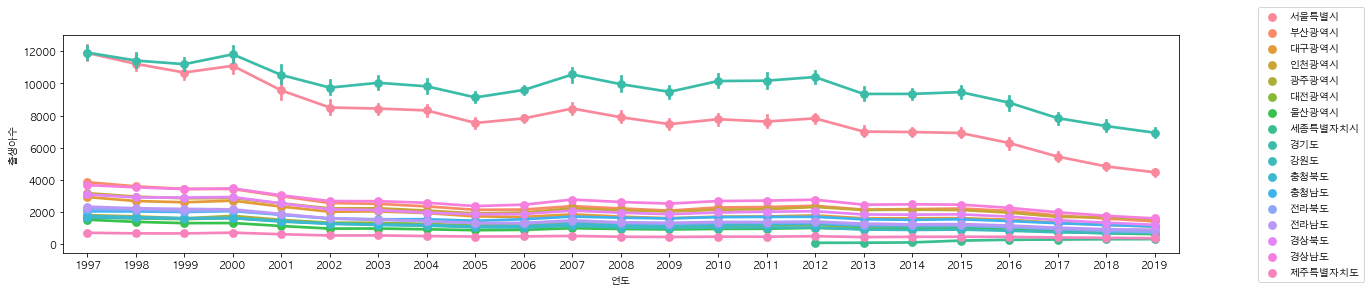

In [163]:
plt.figure(figsize = (20,4))
sns.pointplot(data = df_local_all,x = '연도',y = '출생아수',hue = '시군구별')
plt.legend(loc = 'center right',bbox_to_anchor = (1.17,0.5), ncol = 1)
# ncol = number of column
# bbox_to_anchor  = (x,y,width,height)


#### plt.legend(bbox_to_anchor=(x0, y0, width, height), loc=)
* https://www.delftstack.com/ko/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/ 참고

In [164]:
# 비교하는 대상이 같으므로 isin 을 이용해서 하라
df_local_2 = df_local_all[df_local_all['시군구별'].isin(['서울특별시','경기도','세종특별자치시'])]
df_local_2['시군구별'].unique()

array(['서울특별시', '세종특별자치시', '경기도'], dtype=object)

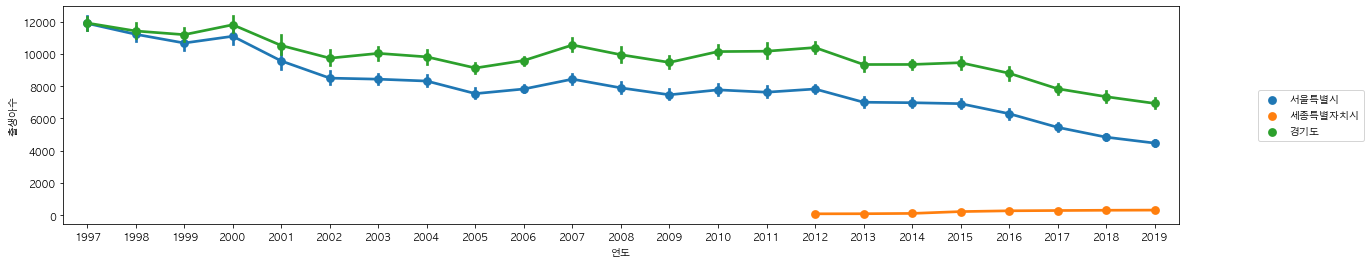

In [166]:
plt.figure(figsize = (20,4))
sns.pointplot(data = df_local_2,x = '연도',y = '출생아수',hue = '시군구별')
plt.legend(loc = 'center right',bbox_to_anchor = (1.17,0.5), ncol = 1)

### 숙제 : 세종특별자치시만 가져와서 그래프 만들어보기